# 載入所需套件

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import regression
import statsmodels.api as sm

%matplotlib inline

# 資料前處理

In [2]:
#載入csv檔
df=pd.read_csv('loan.csv')
#去除有遺漏值的資料
df.dropna(axis=0,inplace=True)
#將類比資料轉成虛擬變數
df.loc[:,'Gender']=df.loc[:,'Gender'].map({'Male':0,'Female':1})
df.loc[:,'Married']=df.loc[:,'Married'].map({'No':0,'Yes':1})
df.loc[:,'Education']=df.loc[:,'Education'].map({'Not Graduate':0,'Graduate':1})
df.loc[:,'Loan_Status']=df.loc[:,'Loan_Status'].map({'N':0,'Y':1})
df.loc[:,'Self_Employed']=df.loc[:,'Self_Employed'].map({'No':0,'Yes':1})
country=pd.get_dummies(df['Property_Area'])
df.drop(columns=['Dependents','Property_Area'],inplace=True)
df=df.join(country[['Semiurban','Urban']])
#查看資料前處理後各變數統計概述
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.179167,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.691667,0.397917,0.312500
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.462287,0.489979,0.463996
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000,1.000000,1.000000


# LPM完整模型

In [3]:
#將所有變數放入的完整模型
X0=df.drop(columns=['Loan_ID','Loan_Status'])
mlr_0=regression.linear_model.OLS(df['Loan_Status'],sm.add_constant(X0)).fit()
mlr_0.summary()

c:\users\黃子瑋\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Status   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     19.94
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           4.87e-33
Time:                        17:08:11   Log-Likelihood:                -217.98
No. Observations:                 480   AIC:                             460.0
Df Residuals:                     468   BIC:                             510.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0693      0.117      0.593      0.553      -0.160       0.299
Gender               -0.0620      0.050     -1.239      0.216      -0.160       0.036
Married               0.0911      0.040      2.261      0.024       0.012       0.170
Education             0.0614      0.045      1.355      0.176      -0.028       0.150
Self_Employed        -0.0189      0.052     -0.363      0.717      -0.121       0.083
ApplicantIncome    6.176e-07   3.75e-06      0.165      0.869   -6.74e-06    7.98e-06
CoapplicantIncome -8.917e-06   7.17e-06     -1.244      0.214    -2.3e-05    5.17e-06
LoanAmount           -0.0004      0.000     -1.558      0.120      -0.001       0.000
Loan_Amount_Term     -0.0001      0.000     -0.395      0.693      -0.001       0.000
Credit_History        0.6717      0.050     13.369      0.000       0.573       0.770
Semiurban             0.1403      0.044      3.223      0.001       0.055       0.226
Urban                 0.0246      0.046      0.534      0.594      -0.066       0.115
==============================================================================
Omnibus:                       68.201   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.465
Skew:                          -1.068   Prob(JB):                     3.07e-21
Kurtosis:                       3.406   Cond. No.                     5.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 只留下顯著變數的LPM模型

In [4]:
X1=X0[['Married','Credit_History','Semiurban']]
mlr_1=regression.linear_model.OLS(df['Loan_Status'],sm.add_constant(X1)).fit()
mlr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Status   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     70.17
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           1.37e-37
Time:                        17:08:11   Log-Likelihood:                -222.35
No. Observations:                 480   AIC:                             452.7
Df Residuals:                     476   BIC:                             469.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0010      0.053      0.018      0.986      -0.103       0.105
Married            0.0926      0.037      2.507      0.013       0.020       0.165
Credit_History     0.6811      0.050     13.618      0.000       0.583       0.779
Semiurban          0.1231      0.036      3.413      0.001       0.052       0.194
==============================================================================
Omnibus:                       72.095   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.051
Skew:                          -1.113   Prob(JB):                     6.92e-23
Kurtosis:                       3.389   Cond. No.                         6.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logit模型

In [5]:
model=sm.Logit(df['Loan_Status'],sm.add_constant(X0)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.456620
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                          Logit   Df Residuals:                      468
Method:                           MLE   Df Model:                           11
Date:                Tue, 22 Sep 2020   Pseudo R-squ.:                  0.2608
Time:                        17:08:11   Log-Likelihood:                -219.18
converged:                       True   LL-Null:                       -296.53
Covariance Type:            nonrobust   LLR p-value:                 1.634e-27
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.5265      0.870     -2.904      0.004      -4.232      -0.821
Gender               -0.3832      0.328     -1.168      0.243      -1.026       0.260
Married               0.5865      0.269      2.178      0.029       0.059       1.114
Education             0.4173      0.302      1.384      0.166      -0.174       1.008
Self_Employed        -0.1423      0.350     -0.407      0.684      -0.827       0.543
ApplicantIncome    6.369e-06   2.98e-05      0.214      0.831    -5.2e-05    6.47e-05
CoapplicantIncome -4.849e-05   4.28e-05     -1.133      0.257      -0.000    3.54e-05
LoanAmount           -0.0028      0.002     -1.561      0.119      -0.006       0.001
Loan_Amount_Term     -0.0007      0.002     -0.351      0.726      -0.005       0.003
Credit_History        3.6131      0.428      8.442      0.000       2.774       4.452
Semiurban             0.9424      0.301      3.133      0.002       0.353       1.532
Urban                 0.0963      0.295      0.327      0.744      -0.481       0.674
=====================================================================================
"""

# Probit模型

In [6]:
model=sm.Probit(df['Loan_Status'],sm.add_constant(X0)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.456519
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                         Probit   Df Residuals:                      468
Method:                           MLE   Df Model:                           11
Date:                Tue, 22 Sep 2020   Pseudo R-squ.:                  0.2610
Time:                        17:08:11   Log-Likelihood:                -219.13
converged:                       True   LL-Null:                       -296.53
Covariance Type:            nonrobust   LLR p-value:                 1.561e-27
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4627      0.458     -3.196      0.001      -2.360      -0.566
Gender               -0.2212      0.188     -1.175      0.240      -0.590       0.148
Married               0.3383      0.153      2.208      0.027       0.038       0.639
Education             0.2473      0.173      1.426      0.154      -0.093       0.587
Self_Employed        -0.0974      0.200     -0.488      0.626      -0.489       0.294
ApplicantIncome    3.052e-06   1.59e-05      0.192      0.848   -2.81e-05    3.42e-05
CoapplicantIncome -2.753e-05   2.55e-05     -1.080      0.280   -7.75e-05    2.24e-05
LoanAmount           -0.0016      0.001     -1.525      0.127      -0.004       0.000
Loan_Amount_Term     -0.0004      0.001     -0.378      0.705      -0.002       0.002
Credit_History        2.1139      0.222      9.536      0.000       1.679       2.548
Semiurban             0.5384      0.168      3.211      0.001       0.210       0.867
Urban                 0.0571      0.171      0.333      0.739      -0.278       0.392
=====================================================================================
"""

# 相關係數矩陣和熱度圖

In [7]:
X0.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
Gender,1.000000,-0.349424,0.059245,0.002761,-0.032644,-0.156171,-0.098975,0.088704,-0.022447,0.108538,-0.057137
Married,-0.349424,1.000000,-0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.011121,0.026467
Education,0.059245,-0.001652,1.000000,0.005085,0.131172,0.074499,0.172780,0.102168,0.056656,0.038137,0.025884
Self_Employed,0.002761,0.015674,0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.015604,-0.034261
ApplicantIncome,-0.032644,0.036717,0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,0.000551,-0.044767
CoapplicantIncome,-0.156171,0.102950,0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.008322,0.009866
LoanAmount,-0.098975,0.183442,0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,0.013365,-0.098826
Loan_Amount_Term,0.088704,-0.107504,0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,0.030346,-0.065097
Credit_History,-0.022447,0.029095,0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.046480,-0.027062
Semiurban,0.108538,0.011121,0.038137,-0.015604,0.000551,-0.008322,0.013365,0.030346,0.046480,1.000000,-0.548096


c:\users\黃子瑋\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\黃子瑋\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


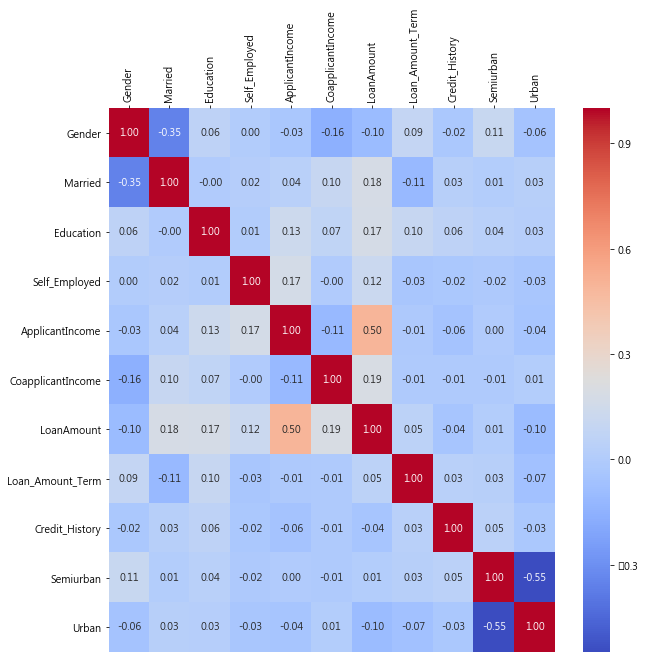

In [8]:
fig,ax=plt.subplots(1,figsize=(10,10))
sns.heatmap(X0.corr(),annot=True,fmt='.2f',cmap='coolwarm')
ax.xaxis.tick_top()
ax.tick_params(axis='x',rotation=90)